In [1]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('seaborn-darkgrid')
np.set_printoptions(precision=2)
pd.set_option('display.precision', 2)



In [2]:
np.random.seed(314)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2))


In [3]:
X.shape

(2, 100)

In [4]:
X

array([[ 0.17,  0.78,  0.85, -0.71, -0.93,  0.89, -0.22,  0.38, -0.77,
         0.86, -0.28, -0.93, -0.5 ,  0.76,  0.19, -0.62,  1.67,  1.74,
         1.18,  1.12, -1.87, -0.64, -0.76,  2.66,  0.17,  0.18,  1.32,
         0.44,  0.2 , -1.53, -0.34, -0.96, -0.23, -1.15, -0.42,  1.33,
        -0.93,  0.11, -1.1 , -0.87, -0.88,  0.4 ,  0.05, -0.85,  0.99,
         0.3 ,  1.71, -0.38, -0.27, -1.14, -0.4 , -0.9 , -0.46,  0.22,
         0.66, -1.15, -0.17, -1.01,  0.18, -1.25,  0.36,  1.48, -0.28,
         0.42, -0.55,  0.24, -0.37,  0.86, -1.4 ,  1.41, -0.44,  1.2 ,
        -1.47, -0.16, -0.67, -1.03,  1.29,  0.16, -0.83,  1.89,  1.79,
         0.09,  0.06, -0.15, -0.85, -0.6 ,  0.86, -2.22,  0.33, -1.29,
         0.85, -1.34,  0.21, -0.6 ,  0.24,  0.73,  1.02,  0.09, -1.07,
         0.42],
       [ 0.35, -0.75,  0.77, -0.69, -0.27,  1.53, -0.1 ,  2.55, -0.74,
         1.44, -1.41, -1.99,  1.43, -0.09, -0.04,  1.12,  2.92,  2.69,
         0.67,  1.12, -1.86, -1.16,  1.08,  2.21,  0.83,  2.3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [epsilon, beta, alpha]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 5 seconds.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3866caf2d0>,
      dtype=object)

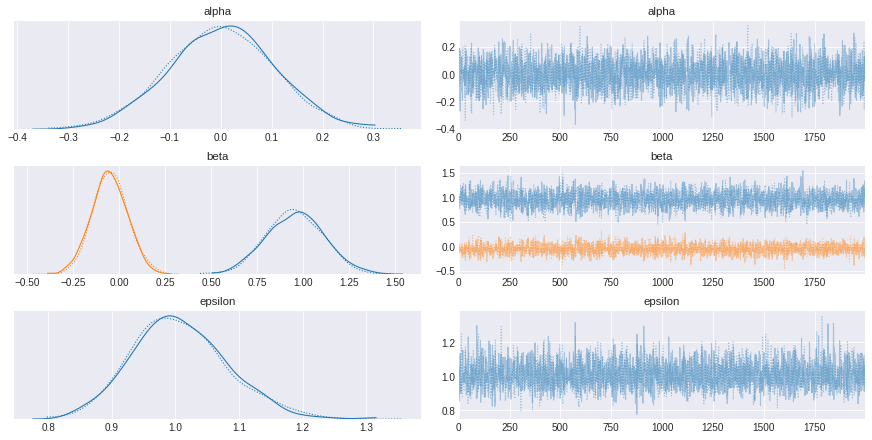

In [5]:
with pm.Model() as model_red:
    alpha= pm.Normal('alpha', mu=0, sd=1)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)

    mu = alpha+ pm.math.dot(beta, X)

    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)

    trace_red = pm.sample(2000, cores=1)

pm.traceplot(trace_red)
